In [30]:
import pandas as pd
import numpy as np

from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sb
import scipy
from scipy.stats import spearmanr

from pylab import rcParams
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import RFE

from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from flask import Flask, request


#Data Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease



hd = pd.read_csv('heart_2020_cleaned.csv')
print(hd.shape)
print(hd.columns)

(319795, 18)
Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


In [31]:
hd.describe()

BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000

In [32]:
# unique values in column "Team"
print("HeartDisease")
print(hd['HeartDisease'].value_counts())

print("Smoking")
print(hd['Smoking'].value_counts())

print("AlcoholDrinking")
print(hd['AlcoholDrinking'].value_counts())

print("Stroke")
print(hd['Stroke'].value_counts())

print("DiffWalking")
print(hd['DiffWalking'].value_counts())

print("Sex")
print(hd['Sex'].value_counts())

print("AgeCategory")
print(hd['AgeCategory'].value_counts())

print("Race")
print(hd['Race'].value_counts())

print("Diabetic")
print(hd['Diabetic'].value_counts())

print("PhysicalActivity")
print(hd['PhysicalActivity'].value_counts())

print("GenHealth")
print(hd['GenHealth'].value_counts())


print("Asthma")
print(hd['Asthma'].value_counts())

print("KidneyDisease")
print(hd['KidneyDisease'].value_counts())

print("SkinCancer")
print(hd['SkinCancer'].value_counts())


HeartDisease
No     292422
Yes     27373
Name: HeartDisease, dtype: int64
Smoking
No     187887
Yes    131908
Name: Smoking, dtype: int64
AlcoholDrinking
No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64
Stroke
No     307726
Yes     12069
Name: Stroke, dtype: int64
DiffWalking
No     275385
Yes     44410
Name: DiffWalking, dtype: int64
Sex
Female    167805
Male      151990
Name: Sex, dtype: int64
AgeCategory
65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64
Race
White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype:

In [33]:
print(hd.head (n=6))

  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   
5          Yes  28.87     Yes              No     No             6.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   
5           0.0         Yes  Female        75-79  Black       No   

  PhysicalActivity

In [34]:
# unique values in column "Team"
print("HeartDisease")
print(hd['HeartDisease'].unique())

print("BMI")
print(hd['BMI'].unique())

print("Smoking")
print(hd['Smoking'].unique())

print("AlcoholDrinking")
print(hd['AlcoholDrinking'].unique())

print("Stroke")
print(hd['Stroke'].unique())

print("PhysicalHealth")
print(hd['PhysicalHealth'].unique())

print("MentalHealth")
print(hd['MentalHealth'].unique())

print("DiffWalking")
print(hd['DiffWalking'].unique())

print("Sex")
print(hd['Sex'].unique())

print("AgeCategory")
print(hd['AgeCategory'].unique())

print("Race")
print(hd['Race'].unique())

print("Diabetic")
print(hd['Diabetic'].unique())

print("PhysicalActivity")
print(hd['PhysicalActivity'].unique())

print("GenHealth")
print(hd['GenHealth'].unique())

print("SleepTime")
print(hd['SleepTime'].unique())

print("Asthma")
print(hd['Asthma'].unique())

print("KidneyDisease")
print(hd['KidneyDisease'].unique())

print("SkinCancer")
print(hd['SkinCancer'].unique())


HeartDisease
['No' 'Yes']
BMI
[16.6  20.34 26.58 ... 62.42 51.46 46.56]
Smoking
['Yes' 'No']
AlcoholDrinking
['No' 'Yes']
Stroke
['No' 'Yes']
PhysicalHealth
[ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
MentalHealth
[30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
DiffWalking
['No' 'Yes']
Sex
['Female' 'Male']
AgeCategory
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity
['Yes' 'No']
GenHealth
['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
SleepTime
[ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
Asthma
['Yes' 'No']
KidneyDisease
['No' 'Yes']
Skin

In [35]:
print(hd.head (n=6))

  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   
5          Yes  28.87     Yes              No     No             6.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   
5           0.0         Yes  Female        75-79  Black       No   

  PhysicalActivity

In [36]:
#Yes/No Dictionary to convert
yes_no_dict={"Yes":1,"No":0}



hd['HeartDiseaseB'] = hd['HeartDisease'].map(yes_no_dict)
hd['SmokingB'] = hd['Smoking'].map(yes_no_dict)
hd['StrokeB'] = hd['Stroke'].map(yes_no_dict)
hd['DiffWalkingB'] = hd['DiffWalking'].map(yes_no_dict)
hd['PhysicalActivityB'] = hd['PhysicalActivity'].map(yes_no_dict)
hd['AsthmaB'] = hd['Asthma'].map(yes_no_dict)
hd['AlcoholDrinkingB'] = hd['AlcoholDrinking'].map(yes_no_dict)
hd['KidneyDiseaseB'] = hd['KidneyDisease'].map(yes_no_dict)
hd['SkinCancerB'] = hd['SkinCancer'].map(yes_no_dict)

#Diabetic [No, Yes, 'No, borderline diabetes', 'Yes (during pregnancy)']
diab_dict={"Yes":1,"No":0,"No, borderline diabetes":0,"Yes (during pregnancy)":0}
hd['DiabB'] = hd['Diabetic'].map(diab_dict)
diab_preg_dict={"Yes":0,"No":0,"No, borderline diabetes":0,"Yes (during pregnancy)":1}
hd['DiabPregB'] = hd['Diabetic'].map(diab_preg_dict)

#Male/Female Dict
mf_dict={"Female":1,"Male":0}
hd['FemaleB'] = hd['Sex'].map(mf_dict)

#RaceDict ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other''Hispanic']
othrnonwhite_dict = {"White":0, "Black":0,"Asian":0,"American Indian/Alaskan Native":0,"Hispanic":0,"Other":1}
hd['Othr_non-white'] = hd['Race'].map(othrnonwhite_dict)
black_dict = {"White":0, "Black":1,"Asian":0,"American Indian/Alaskan Native":0,"Hispanic":0,"Other":0}
hd['BlackB'] = hd['Race'].map(black_dict)

asian_dict = {"White":0, "Black":0,"Asian":1,"American Indian/Alaskan Native":0,"Hispanic":0,"Other":0}
hd['AsianB'] = hd['Race'].map(asian_dict)

AI_dict = {"White":0, "Black":0,"Asian":0,"American Indian/Alaskan Native":1,"Hispanic":0,"Other":0}
hd['AI_AN_B'] = hd['Race'].map(AI_dict)

hispanic_dict = {"White":0, "Black":0,"Asian":0,"American Indian/Alaskan Native":0,"Hispanic":1,"Other":0}
hd['HispanicB'] = hd['Race'].map(hispanic_dict)

#Age
O55_dict = {'55-59':1, '80 or older':1, '65-69':1, '75-79':1, '40-44':0, '70-74':1, '60-64':1, '50-54':0,
 '45-49':0, '18-24':0, '35-39':0, '30-34':0, '25-29':0}
hd['Over55B'] = hd['AgeCategory'].map(O55_dict)

#GenHealth['Poor'=1,'Fair'=2,'Very good'=3,'Good'=4, 'Excellent'=5]
genhlth_dict = {'Poor':1,'Fair':2,'Very good':3,'Good':4, 'Excellent':5}
hd['GenHealthCtgry'] = hd['GenHealth'].map(genhlth_dict)

print(hd.columns)


Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'HeartDiseaseB', 'SmokingB',
       'StrokeB', 'DiffWalkingB', 'PhysicalActivityB', 'AsthmaB',
       'AlcoholDrinkingB', 'KidneyDiseaseB', 'SkinCancerB', 'DiabB',
       'DiabPregB', 'FemaleB', 'Othr_non-white', 'BlackB', 'AsianB', 'AI_AN_B',
       'HispanicB', 'Over55B', 'GenHealthCtgry'],
      dtype='object')


In [37]:
hd = hd.drop(columns=['PhysicalActivity','Diabetic','GenHealth','HeartDisease','Smoking', 'AlcoholDrinking', 'Stroke','DiffWalking', 'Sex', 'AgeCategory','Race', 'Diabetic','Asthma', 'KidneyDisease', 'SkinCancer'], axis=1)
print(hd.columns)

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'HeartDiseaseB',
       'SmokingB', 'StrokeB', 'DiffWalkingB', 'PhysicalActivityB', 'AsthmaB',
       'AlcoholDrinkingB', 'KidneyDiseaseB', 'SkinCancerB', 'DiabB',
       'DiabPregB', 'FemaleB', 'Othr_non-white', 'BlackB', 'AsianB', 'AI_AN_B',
       'HispanicB', 'Over55B', 'GenHealthCtgry'],
      dtype='object')


<Figure size 720x432 with 0 Axes>

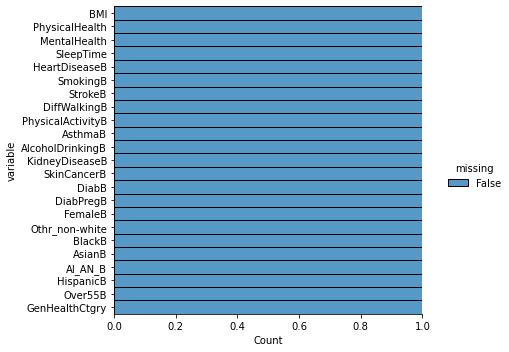

In [38]:
plt.figure(figsize=(10,6))
sb.displot(
    data=hd.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [39]:
#plt.figure(figsize=(25,25))
#corr = hd.corr()
#sb.heatmap(corr,annot=True)
#plt.show()

cor = hd.corr()
#sb.heatmap(corr,annot=True, cmap=plt.cm.RdYlBu)
cor.style.background_gradient(cmap='coolwarm')

In [40]:
#removing general mental health due to high collinearity with other variables
hd3 = hd.drop(columns=['GenHealthCtgry'], axis=1)
print(hd.columns)

cor = hd3.corr()
#sb.heatmap(corr,annot=True, cmap=plt.cm.RdYlBu)
cor.style.background_gradient(cmap='coolwarm')

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'HeartDiseaseB',
       'SmokingB', 'StrokeB', 'DiffWalkingB', 'PhysicalActivityB', 'AsthmaB',
       'AlcoholDrinkingB', 'KidneyDiseaseB', 'SkinCancerB', 'DiabB',
       'DiabPregB', 'FemaleB', 'Othr_non-white', 'BlackB', 'AsianB', 'AI_AN_B',
       'HispanicB', 'Over55B', 'GenHealthCtgry'],
      dtype='object')


In [41]:
target_corr =  abs(corr["HeartDiseaseB"])
positive_corr_target= target_corr[target_corr>(.2)]
print(positive_corr_target)


NameError: name 'corr' is not defined

In [ ]:
print(hd[["DiffWalkingB","Over55B"]].corr())

In [ ]:
sb.countplot(data=hd, x="FemaleB", hue="HeartDiseaseB")

In [ ]:
# show histograms for each numeric factor

hd3.hist(figsize=(12,12))
plt.show()

In [ ]:
x=hd3.drop(["HeartDiseaseB"],axis=1)
y=hd3["HeartDiseaseB"]


#Create Test/Train Variables using test_train_split from sklearn 25% in test
x_train, x_test, y_train, y_test = train_test_split(hd, y, test_size=0.25)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_train.shape)
w_test=x_test

In [ ]:
lrm=linear_model.LinearRegression()
lrm_model = lrm.fit(x_train,y_train)
lrm_predictions = lrm.predict(x_test)

lrm_predictions[0:10]

In [ ]:
#plt.scatter(y_test, lrm_predictions)
#plt.title("Plot of Actual Versus Predicted Values")
#plt.xlabel('Actual Values')
#plt.ylabel('Predicted Values')

print("Score:", lrm_model.score(x_test,y_test))


In [ ]:
print(lrm_predictions)
type(lrm_predictions)

In [ ]:
hdc = pd.DataFrame(x_test)
hdc["HeartDisease Actuals"]= y_test
hdc["HD Predictions"] = lrm_predictions

hdc.head(n=15)

In [ ]:
hdc.describe()

In [ ]:
hdc.to_csv(r"heart_2020_results.csv")

In [ ]:
Log_reg=LogisticRegression(solver='lbfgs', max_iter=10000)
Log_reg.fit(x_train, y_train)

In [ ]:
z_pred=Log_reg.predict(w_test)

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
sb.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)